## Name: Krishnakanth N.
## Index No: 190323C

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Q1)

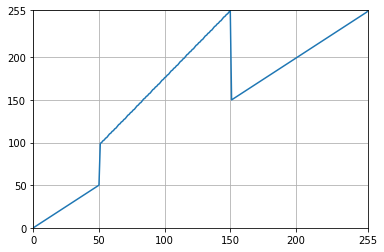

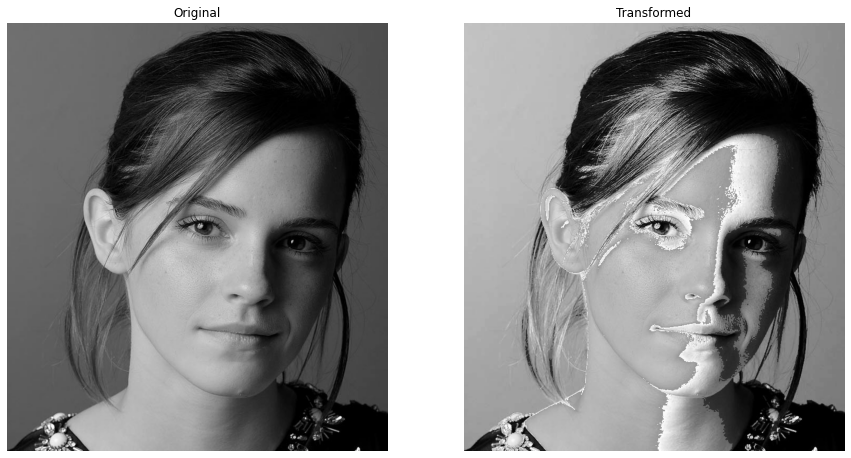

In [16]:
emma = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

t1 = np.linspace(0, 50, 51)
t2 = np.linspace(99, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

assert len(t) == 256

emma_intense = cv.LUT(emma, t)
emma_intense = cv.cvtColor(emma_intense, cv.COLOR_BGR2RGB)
emma = cv.cvtColor(emma, cv.COLOR_BGR2RGB)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(emma)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(emma_intense)
ax[1].set_title('Transformed')
ax[1].axis('off')

plt.show()

### Q2)
### a)

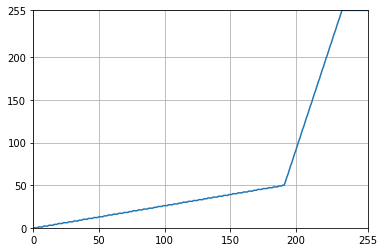

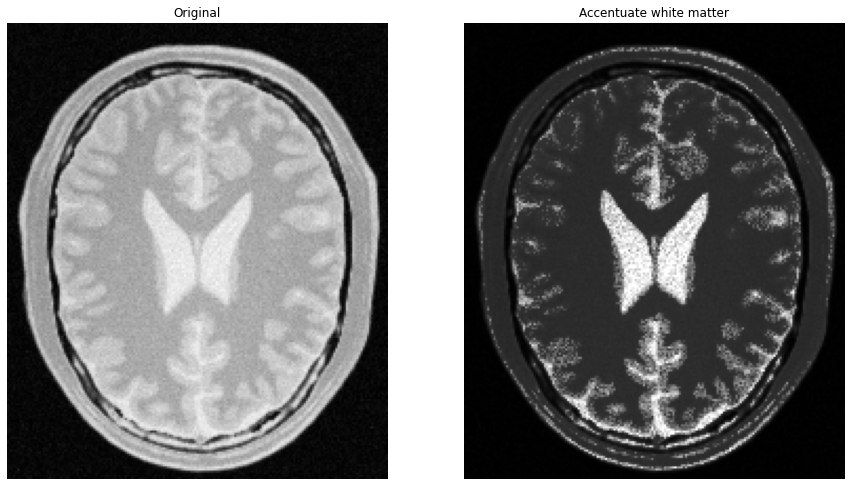

In [20]:
brain = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

t1 = np.linspace(0,50, 191)
t2 = np.linspace(50,255, 45)
t3 = np.linspace(255,255, 20)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

brian_at_white = cv.LUT(brain, t)
brian_at_white = cv.cvtColor(brian_at_white, cv.COLOR_BGR2RGB)
brain = cv.cvtColor(brain, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(brain)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(brian_at_white)
ax[1].set_title('Accentuate white matter')
ax[1].axis('off')

plt.show()

### b)

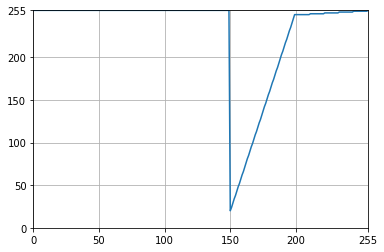

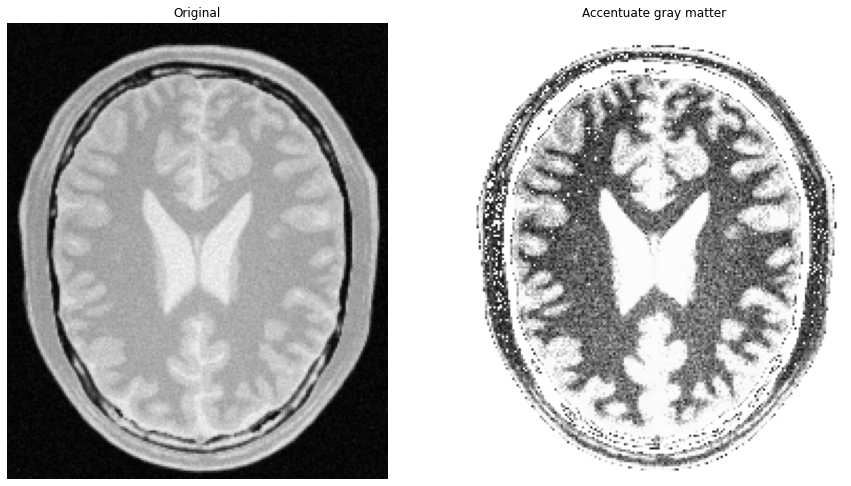

In [5]:
t1 = np.linspace(255, 255, 150)
t2 = np.linspace(20, 250, 50)
t3 = np.linspace(250,255, 56)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

brian_at_white = cv.LUT(brain, t)
brian_at_white = cv.cvtColor(brian_at_white, cv.COLOR_BGR2RGB)
brain = cv.cvtColor(brain, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(brain)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(brian_at_white)
ax[1].set_title('Accentuate gray matter')
ax[1].axis('off')

plt.show()

### Q3) a)

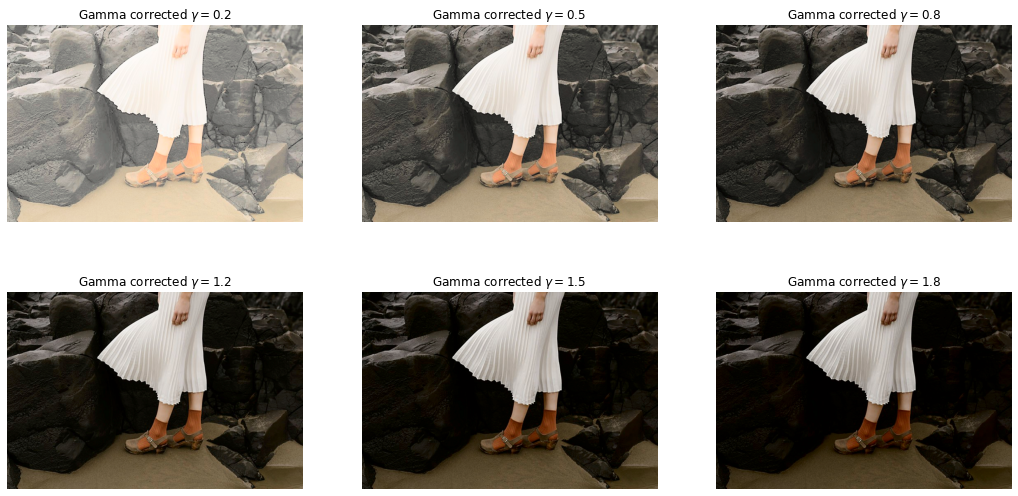

In [6]:
import copy
gamma_img = cv.imread(r'highlights_and_shadows.jpg')
gamma_img = cv.cvtColor(gamma_img, cv.COLOR_BGR2LAB)

gamma_list = [ 0.2, 0.5, 0.8, 1.2, 1.5, 1.8]
j=0
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

for gamma in gamma_list:    
    r=j//3
    c=j%3

    img_copy = copy.deepcopy(gamma_img)

    t = np.array([(p/255)**gamma*255 for p in range (0, 256)]).astype(np.uint8)
    img_copy[:,:,0] = cv.LUT(img_copy[:,:,0], t)
    img_copy = cv.cvtColor(img_copy, cv.COLOR_LAB2RGB)
    
    ax[r][c].imshow(img_copy)
    ax[r][c].set_title('Gamma corrected $\gamma = {}$'.format(gamma))
    ax[r][c].axis('off')

    j+=1
plt.show()


### b)

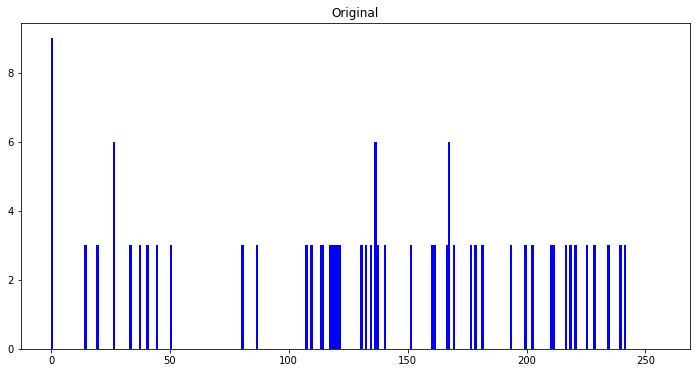

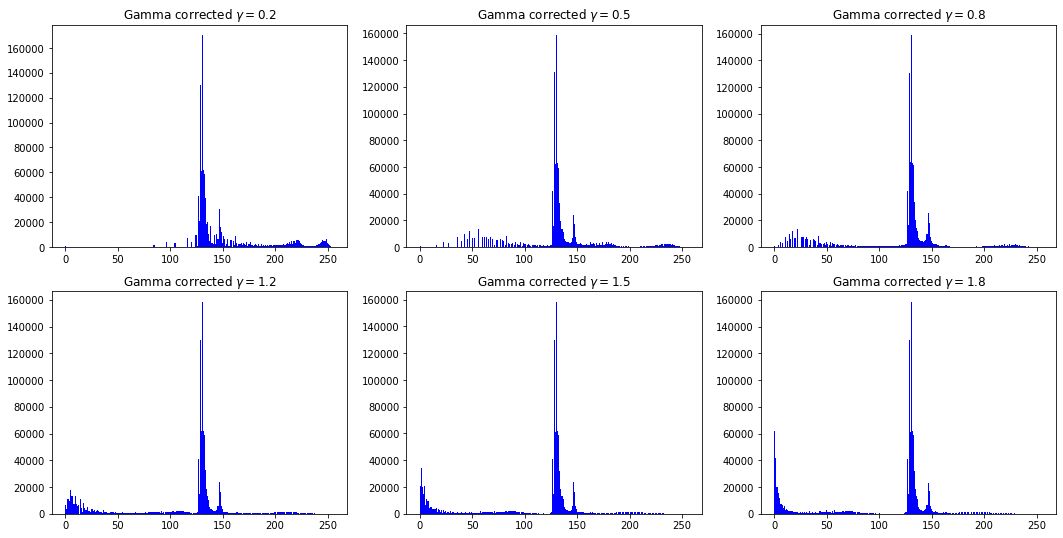

In [17]:
hist_original = cv.calcHist([gamma_img], [0], None, [256], [0,256])
# hist_original = plt.hist(gamma_img.flatten(), 256, [0,256])
hist_original = cv.cvtColor(hist_original, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(hist_original)
ax.hist(hist_original.flatten(), 256, [0,256], color='b')
ax.set_title(r'Original')
plt.show()

fig, ax = plt.subplots(2, 3, figsize=(18, 9))
j=0
for gamma in gamma_list:    
    r=j//3
    c=j%3

    img_copy = copy.deepcopy(gamma_img)

    t = np.array([(p/255)**gamma*255 for p in range (0, 256)]).astype(np.uint8)
    img_copy[:,:,0] = cv.LUT(img_copy[:,:,0], t)
    # hist_after = cv.calcHist([img_copy], [0], None, [256], [0,256])
    # hist_after = plt.hist(img_copy.flatten(), 256, [0,256], color='b')
    
    # ax[r][c].plot(hist_after)
    ax[r][c].hist(img_copy.flatten(), 256, [0,256], color='b')
    ax[r][c].set_title('Gamma corrected $\gamma = {}$'.format(gamma))

    j+=1
plt.show()

### Q4)

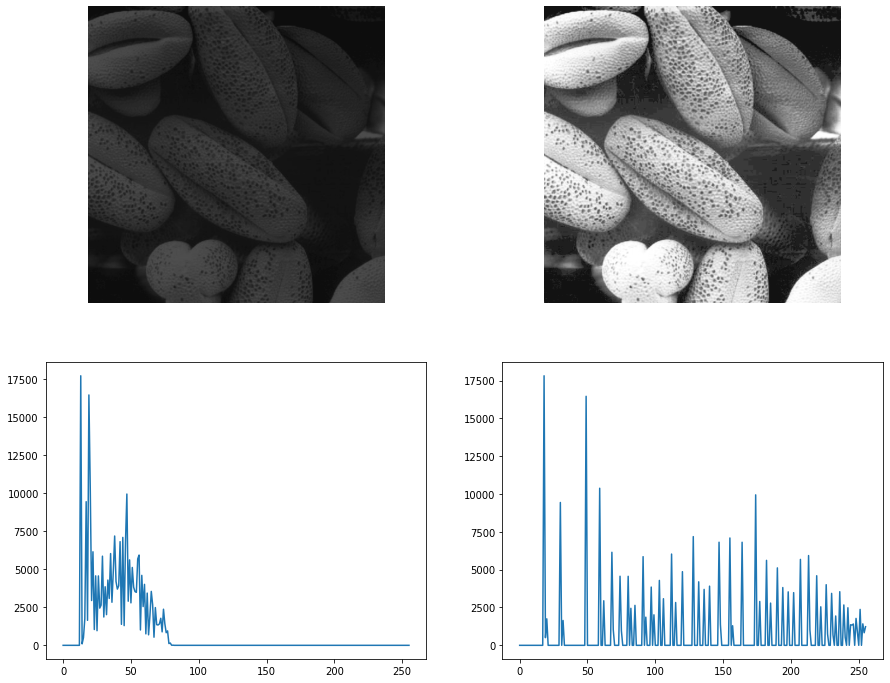

In [32]:
hist_img = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE).astype(np.uint8)
hist , bins = np.histogram(hist_img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = np.round(cdf*255/cdf.max())
enhanced = cv.LUT(hist_img, cdf_normalized)

hist_new , bins_new = np.histogram(enhanced.ravel(), 256, [0, 256])

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ax[0,0].imshow(hist_img, cmap='gray', vmin=0, vmax=255)
ax[0,0].axis('off')
ax[0,1].imshow(enhanced, cmap='gray', vmin=0, vmax=255)
ax[0,1].axis('off')
ax[1,0].plot(hist)
ax[1,1].plot(hist_new)

plt.show()

### Q5) a)

In [12]:
zoom_img = cv.imread(r'./a1q5images/im01small.png').astype(np.uint8)
# zoom_img = cv.cvtColor(zoom_img, cv.COLOR_BGR2RGB)
s=2

def nearest_neighbour(image, s):
    row = int(np.round(image.shape[0]*s))
    column = int(np.round(image.shape[1]*s))
    zoomed = np.zeros((row, column, 3), np.uint8)
    for i in range(0, row):
        for j in range(0, column):            
            (x, y) = int(np.round(i/s)), int(np.round(j/s))
            if x == image.shape[0]:
                x = image.shape[0] -1
            if y == image.shape[1]:
                y = image.shape[1] -1
            zoomed[i, j] = image[x, y]
    return zoomed
zoomed = nearest_neighbour(zoom_img, s)
cv.imwrite('NNOriginal.png', zoom_img)
cv.imwrite('NNZoomed.png', zoomed)

cv.imshow('NNOriginal', zoom_img)
cv.waitKey(0)
cv.imshow('NNZoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()

### b)

In [27]:
zoom_img = cv.imread(r'./a1q5images/im03small.png').astype(np.uint8)
s=8

def bilinear_interpolation(image, scale):
    row = int(np.round(image.shape[0]*scale))
    column = int(np.round(image.shape[1]*scale))
    zoomed = np.zeros((row, column, 3), np.uint8)
    for i in range(0, row):
        for j in range(0, column):
            (x, y) = i/scale, j/scale
            x_floor = int(np.floor(x))
            x_ceil = int(np.ceil(x))
            y_floor = int(np.floor(y))
            y_ceil = int(np.ceil(y))
            if x_ceil == image.shape[0]:
                x_ceil = image.shape[0] - 1
            if y_ceil == image.shape[1]:
                y_ceil = image.shape[1] - 1
            x_floor_dist = x - x_floor
            x_ceil_dist = x_ceil - x
            y_floor_dist = y - y_floor
            y_ceil_dist = y_ceil - y
            left_weight = image[x_floor, y_floor]*x_ceil_dist + image[x_ceil, y_floor]*x_floor_dist
            right_weight = image[x_floor, y_floor]*x_ceil_dist + image[x_floor, y_ceil]*x_floor_dist
            zoomed[i, j] = np.round(left_weight*y_ceil_dist + right_weight*y_floor_dist).astype(np.uint8)
            
    return zoomed


zoomed = bilinear_interpolation(zoom_img, s)
cv.imwrite('BNOriginal.png', zoom_img)
cv.imwrite('BNZoomed.png', zoomed)


cv.imshow('BNOriginal', zoom_img)
cv.waitKey(0)
cv.imshow('BNZoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()


### Q6) a)

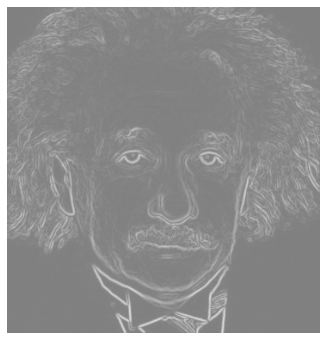

In [32]:
sobel_img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_h = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)
g_x = cv.filter2D(sobel_img, -1, sobel_h)

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
g_y = cv.filter2D(sobel_img, -1, sobel_v)

g = np.sqrt(g_x**2 + g_y**2)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(g, cmap='gray', vmin=-1020, vmax=1020)
ax.axis('off')

plt.show()

### b)

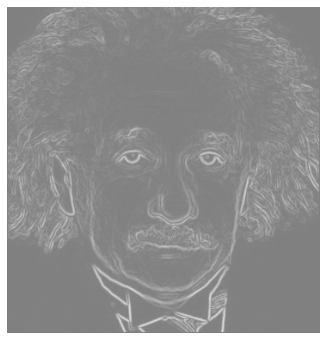

In [35]:
def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = int(np.floor(kernel.shape[0]/2)), int(math.floor(kernel.shape[1]/2))
    h, w = image.shape
    image_float = image.astype('float')
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw , w - k_hw):
            result[m, n] = np.dot(image_float[m - k_hh : m + k_hh + 1 , n - k_hw : n+ k_hw + 1].flatten(), kernel.flatten())

    return result

f_x = filter(sobel_img, sobel_h)
f_y = filter(sobel_img, sobel_v)
f = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(f, cmap='gray', vmin=-1020, vmax=1020)
ax.axis('off')

plt.show()


### c)